# Capstone Project: Random Forest Regression: SGCarMart Used Cars Price Predictor

In [86]:
import pandas as pd
import numpy as np
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
import patsy

## Section 1: DataFrame Loading, Cleaning

In [87]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(10)

,LISTING_URL,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
5415,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota Noah Hybrid 1.8A X,198800.0,18960.0,19-Aug-24,23.0,MPV,974.0,2024,95656.0,3/9/2024,NaN,NaN,100889.0,3320.0,1797.0,1640.0,1.0,NaN
4090,https://www.sgcarmart.com/used_cars/info.php?I...,Rolls-Royce Corniche,325000.0,38910.0,20-Dec-22,30000.0,1976,280.0,Auto,8750.0,3/9/2024,12678.0,12678.0,10937.0,3016.0,6749.0,2165.0,1.0,Luxury Sedan
1024,https://www.sgcarmart.com/used_cars/info.php?I...,Honda Jazz 1.3A,65000.0,13640.0,25-Mar-19,92800.0,2019,578.0,Auto,15826.0,3/9/2024,15738.0,5738.0,25920.0,1641.0,1318.0,1052.0,1.0,Hatchback
395,https://www.sgcarmart.com/used_cars/info.php?I...,Mazda MX-5 RF 2.0M,145800.0,23630.0,24-Oct-19,23000.0,2019,1210.0,Manual,58005.0,3/9/2024,40493.0,48691.0,41805.0,1855.0,1998.0,1148.0,2.0,Sports Car
6438,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota Harrier 2.0A Elegance Panoramic Roof,66000.0,18530.0,30-May-17,NaN,2016,1196.0,Auto,32627.0,3/9/2024,31196.0,30675.0,52000.0,976.0,1986.0,1610.0,3.0,SUV
6359,https://www.sgcarmart.com/used_cars/info.php?I...,Honda Fit 1.3A GF,70000.0,14010.0,17-Jun-19,63004.0,2019,578.0,Auto,18495.0,3/9/2024,15903.0,5903.0,30009.0,1733.0,1317.0,1030.0,2.0,Hatchback
6617,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz C-Class C180 Avantgarde,47888.0,22220.0,14-Jan-16,91000.0,2015,740.0,Auto,27548.0,3/9/2024,34471.0,35260.0,59889.0,485.0,1595.0,1425.0,2.0,Luxury Sedan
6685,https://www.sgcarmart.com/used_cars/info.php?I...,Skoda Octavia 1.4A TSI Ambition Plus,84777.0,14160.0,20-Dec-19,80026.0,2019,624.0,Auto,33722.0,3/9/2024,19543.0,19543.0,36000.0,1921.0,1395.0,1289.0,1.0,Mid-Sized Sedan
2745,https://www.sgcarmart.com/used_cars/info.php?I...,Skoda Superb 2.0A TSI Laurin,123000.0,17240.0,25-Sep-20,27953.0,2020,1194.0,Auto,52893.0,3/9/2024,32130.0,36982.0,41510.0,2191.0,1984.0,1535.0,1.0,Luxury Sedan
5857,https://www.sgcarmart.com/used_cars/info.php?I...,Honda Civic 1.6A VTi,46800.0,16800.0,18-Jun-07,NaN,2007,1110.0,Auto,14106.0,3/9/2024,17949.0,19744.0,50625.0,1004.0,1595.0,1220.0,4.0,Mid-Sized Sedan


In [88]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [89]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1) # Dropping columns that I used for my own reference

# We see that we have NA entries in this dataset. 
# We want to drop these NA values or they will pose problems for us later
# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6719 entries, 0 to 6718
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         6719 non-null   object 
 1   PRICE                         6670 non-null   float64
 2   DEPRE_YEARLY                  6561 non-null   float64
 3   REG_DATE                      6719 non-null   object 
 4   MILEAGE_KM                    5760 non-null   float64
 5   MANUFACTURED_YEAR             6719 non-null   object 
 6   ROAD_TAX_YEARLY               6640 non-null   float64
 7   TRANSMISSION                  6719 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  6254 non-null   float64
 9   OMV                           5637 non-null   float64
 10  ARF                           5648 non-null   float64
 11  COE_FROM_SCRAPE_DATE          6339 non-null   float64
 12  DAYS_OF_COE_LEFT              6696 non-null   float64
 13  ENGINE_C

In [90]:
# Taking a look at our data
df_clean.sample(10)

,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
3380,Peugeot RCZ 1.6A Turbo,92800.0,14300.0,22-Mar-11,91000.0,2011,1039.0,Auto,25860.0,36917.0,36917.0,39844.0,2345.0,1598.0,1336.0,2.0,Sports Car
5438,BMW 5 Series 520i Mild Hybrid Executive,233800.0,25450.0,30-Jul-22,26500.0,Luxury,1210.0,2022,136245.0,NaN,NaN,110524.0,2561.0,1998.0,1610.0,1.0,NaN
4753,Lexus RX Turbo RX200t Executive,89800.0,25260.0,30-Dec-16,NaN,2016,1210.0,Auto,49118.0,50208.0,62375.0,50389.0,826.0,1998.0,1890.0,3.0,SUV
4902,Volkswagen Passat 2.0A TFSI Sunroof,45900.0,15950.0,18-Apr-16,109603.0,2016,1194.0,Auto,30974.0,34392.0,40149.0,54920.0,579.0,1984.0,1505.0,3.0,Luxury Sedan
2107,BMW 3 Series 318i Sunroof,66800.0,11810.0,30-Apr-10,200000.0,2009,1812.0,Auto,18982.0,29926.0,29926.0,33568.0,2041.0,1995.0,1390.0,3.0,Luxury Sedan
2711,Volvo XC60 T5 2.0A,NaN,NaN,25-Jan-17,NaN,2016,1176.0,Auto,NaN,36151.0,42612.0,50389.0,851.0,1969.0,1722.0,2.0,SUV
3386,Volkswagen Jetta GP 1.4A TSI Highline,24900.0,13310.0,27-Oct-15,81000.0,2015,620.0,Auto,17032.0,19307.0,19307.0,56001.0,398.0,1390.0,1417.0,1.0,Mid-Sized Sedan
3268,Honda Civic 1.5A VTEC Turbo Sunroof,87000.0,16420.0,30-Jan-19,NaN,2018,684.0,Auto,34654.0,26611.0,29256.0,32909.0,1586.0,1498.0,1324.0,2.0,Mid-Sized Sedan
1309,BMW 6 Series 640i Coupe Sunroof,118800.0,16400.0,27-Jun-12,121000.0,2012,3071.0,Auto,48090.0,80783.0,80783.0,66387.0,2622.0,2979.0,1660.0,3.0,Sports Car
2161,Audi Q8 Sportback e-tron Electric 50 Quattro S...,375999.0,32180.0,28-Jun-24,1300.0,SUV,3977.0,2023,148001.0,NaN,NaN,110001.0,3559.0,NaN,2585.0,1.0,NaN


In [91]:
# We now have rows of data after dropping null values

df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 1 to 6718
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         4316 non-null   object 
 1   PRICE                         4316 non-null   float64
 2   DEPRE_YEARLY                  4316 non-null   float64
 3   REG_DATE                      4316 non-null   object 
 4   MILEAGE_KM                    4316 non-null   float64
 5   MANUFACTURED_YEAR             4316 non-null   object 
 6   ROAD_TAX_YEARLY               4316 non-null   float64
 7   TRANSMISSION                  4316 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  4316 non-null   float64
 9   OMV                           4316 non-null   float64
 10  ARF                           4316 non-null   float64
 11  COE_FROM_SCRAPE_DATE          4316 non-null   float64
 12  DAYS_OF_COE_LEFT              4316 non-null   float64
 13  ENGINE_C

In [92]:
print(df_clean['VEHICLE_TYPE'].unique())

['SUV' 'Hatchback' 'MPV' 'Luxury Sedan' 'Mid-Sized Sedan' 'Sports Car'
 'Stationwagon' 'Others']


No KDE plot generated for vehicle type: SUV
No KDE plot generated for vehicle type: Hatchback
No KDE plot generated for vehicle type: MPV
No KDE plot generated for vehicle type: Luxury Sedan
No KDE plot generated for vehicle type: Mid-Sized Sedan
No KDE plot generated for vehicle type: Sports Car
No KDE plot generated for vehicle type: Stationwagon
No KDE plot generated for vehicle type: Others


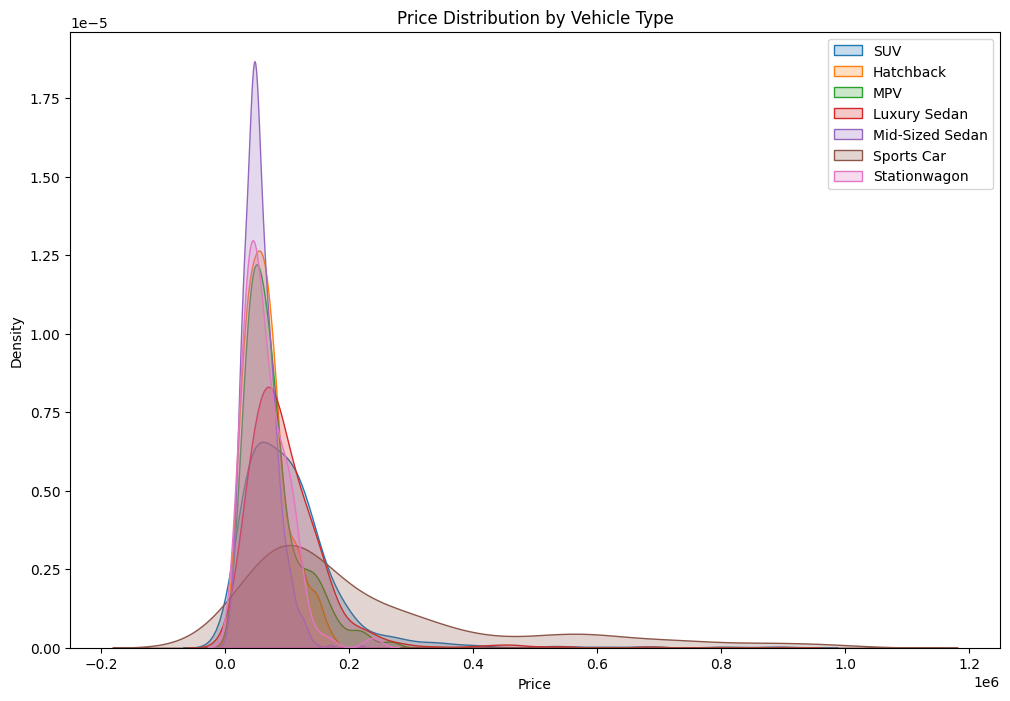

In [93]:
# Assuming your DataFrame is named 'cars'
unique_vehicle_types = df_clean['VEHICLE_TYPE'].unique()

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the KDE for each unique vehicle type
for vehicle_type in unique_vehicle_types:
    
    # Get the price data for the current vehicle type
    price_data = df_clean.loc[df_clean['VEHICLE_TYPE']==vehicle_type, 'PRICE']
    
    # Check if the price data has any variance
    if np.var(price_data) == 0:
        print(f"No KDE plot generated for vehicle type: {vehicle_type}")
        continue
    
    # Plot the KDE
    kde = sns.kdeplot(price_data, fill=True, label=vehicle_type, ax=ax)
    
    # Get the x and y values for the KDE
    lines = kde.get_lines()
    if lines:
        x, y = lines[0].get_data()
        
        # Add the actual price and density values to the plot
        for i, val in enumerate(price_data):
            ax.annotate(f"{val:.0f}", (x[i], y[i]), xytext=(5, 0), textcoords="offset points")
    else:
        print(f"No KDE plot generated for vehicle type: {vehicle_type}")

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Density')
ax.set_title('Price Distribution by Vehicle Type')
ax.legend()

plt.show()

In [94]:
# Get the count of data points for each vehicle type
vehicle_type_counts = df_clean['VEHICLE_TYPE'].value_counts()

# Print the counts
print(vehicle_type_counts)

VEHICLE_TYPE
SUV                1191
Luxury Sedan        875
Mid-Sized Sedan     674
Sports Car          547
Hatchback           503
MPV                 436
Stationwagon         89
Others                1
Name: count, dtype: int64


In [95]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


## Section 2: Data Categorizing

### Section 2.1: One-hot encoding TRANSMISSION Column

In [96]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      4276
Manual      40
Name: count, dtype: int64

In [97]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(10)

,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
2904,Subaru XV 2.0i-S EyeSight,69800.0,14630.0,27-Dec-18,46000.0,2018,1208.0,23051.0,13321.0,13321.0,31809.0,1553.0,1995.0,1489.0,1.0,SUV,1
104,BMW 2 Series 216i Gran Tourer,82000.0,15170.0,22-Nov-18,57000.0,2018,684.0,37190.0,31412.0,35977.0,28457.0,1528.0,1499.0,1490.0,2.0,MPV,1
199,Kia Cerato 1.6A EX,75500.0,14020.0,18-Jul-19,90000.0,2018,738.0,26249.0,14395.0,14395.0,33199.0,1464.0,1591.0,1287.0,1.0,Mid-Sized Sedan,1
1391,Toyota Wish 1.8A X,29800.0,14150.0,23-Feb-16,120000.0,2015,974.0,17256.0,17976.0,17976.0,50089.0,524.0,1797.0,1350.0,1.0,MPV,1
6625,Hyundai Avante 1.6A GLS,68800.0,12810.0,19-Jul-19,77600.0,2019,738.0,22874.0,12771.0,12771.0,28589.0,1465.0,1591.0,1345.0,2.0,Mid-Sized Sedan,1
3535,Nissan Qashqai 1.2A DIG-T,28888.0,13350.0,26-Apr-16,128000.0,2016,508.0,15236.0,18974.0,13974.0,46009.0,577.0,1197.0,1285.0,1.0,SUV,1
2743,Nissan Almera 1.5A,28800.0,13300.0,13-Apr-16,132000.0,2015,684.0,15572.0,14882.0,14882.0,46009.0,584.0,1498.0,1040.0,2.0,Mid-Sized Sedan,1
6565,Mitsubishi ASX 2.0A,50000.0,12910.0,24-Nov-17,123893.0,2017,1210.0,29410.0,16787.0,16787.0,57414.0,1155.0,1998.0,1365.0,1.0,SUV,1
2291,Audi Q3 1.4A TFSI S-tronic,144999.0,19520.0,26-Apr-21,42000.0,2021,624.0,54162.0,27557.0,30580.0,47001.0,2402.0,1395.0,1545.0,1.0,SUV,1
5242,Nissan Qashqai 1.2A DIG-T,48000.0,12630.0,22-Nov-17,110000.0,2017,508.0,24741.0,19750.0,14750.0,47112.0,1163.0,1197.0,1325.0,3.0,SUV,1


In [98]:
   print(df_clean.dtypes)

BRAND                            object
PRICE                           float64
DEPRE_YEARLY                    float64
REG_DATE                         object
MILEAGE_KM                      float64
MANUFACTURED_YEAR                object
ROAD_TAX_YEARLY                 float64
DEREG_VALUE_FROM_SCRAPE_DATE    float64
OMV                             float64
ARF                             float64
COE_FROM_SCRAPE_DATE            float64
DAYS_OF_COE_LEFT                float64
ENGINE_CAPACITY_CC              float64
CURB_WEIGHT_KG                  float64
NO_OF_OWNERS                    float64
VEHICLE_TYPE                     object
TRANSMISSION                      int64
dtype: object


In [99]:
   df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].astype(str)

In [100]:
   # Identify the rows with string values
   string_rows = df_clean['VEHICLE_TYPE'].apply(lambda x: isinstance(x, str))
   
   # Apply the str.strip() operation to the string rows
   df_clean.loc[string_rows, 'VEHICLE_TYPE'] = df_clean.loc[string_rows, 'VEHICLE_TYPE'].apply(str.strip)
   
   # Concatenate the result back to the DataFrame
   df_clean = df_clean

In [101]:
# Performing whitespace stripping prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)

# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                1191
Luxury Sedan        875
Mid-Sized Sedan     674
Sports Car          547
Hatchback           503
MPV                 436
Stationwagon         89
Others                1
Name: count, dtype: int64

## Section 2.2: Datetime conversion

In [102]:
   print(df_clean['MANUFACTURED_YEAR'].unique())

['2019' '2016' '2017' '2010' '2018' '2015' '2022' '2011' '2020' '2008'
 '2009' '2021' '2003' '2014' '2007' '2023' '2005' '2012' '2013' '2006'
 '2024' '2004' '1966' '1960' '1980' '1976']


In [103]:
   df_clean = df_clean[df_clean['MANUFACTURED_YEAR'].str.isdigit()]
   df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)

In [104]:
   print(df_clean['MANUFACTURED_YEAR'].unique())

[2019 2016 2017 2010 2018 2015 2022 2011 2020 2008 2009 2021 2003 2014
 2007 2023 2005 2012 2013 2006 2024 2004 1966 1960 1980 1976]


## Section 2.2: Datetime conversion

In [105]:
# Converting reg_date to datetime, and Manufactured year to int

df_clean['REG_DATE'] = pd.to_datetime(df_clean['REG_DATE'], format='%d-%b-%y', dayfirst=True, errors='coerce')
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean[['REG_DATE','MANUFACTURED_YEAR']].dtypes


REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [106]:
df_main['SCRAPE_DATE']

0       3/9/2024
1       3/9/2024
2       3/9/2024
3       3/9/2024
4       3/9/2024
          ...   
6714    3/9/2024
6715    3/9/2024
6716    3/9/2024
6717    3/9/2024
6718    3/9/2024
Name: SCRAPE_DATE, Length: 6719, dtype: object

In [107]:
if df_main['SCRAPE_DATE'].dtype == object:
    df_main['SCRAPE_DATE'] = \
    pd.to_datetime(df_main['SCRAPE_DATE']).dt.year # Convert scrape date to integer to perform operations on them

In [108]:
df_main['SCRAPE_DATE']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
6714    2024
6715    2024
6716    2024
6717    2024
6718    2024
Name: SCRAPE_DATE, Length: 6719, dtype: int32

### Section 2.2.1: Adding a Car Age Column

In [109]:
# Obtaining number of years from year of manufacture to current year (metric for how new the car is)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'] - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

1        5
3        8
4        5
5        7
6       14
        ..
6709     7
6712     8
6714     9
6716     9
6718     9
Name: CAR_AGE, Length: 4316, dtype: int32

In [110]:
# Rearranging Columns 
df_clean = df_clean[['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_clean.head()

,BRAND,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
1,Honda HR-V 1.5A LX,78800.0,14790.0,94000.0,25501.0,1647.0,2019-03-21,2019,5.0,27800.0,22254.0,23156.0,1496.0,682.0,1200.0,1.0,SUV,1
3,Mercedes-Benz A-Class A200,53800.0,18370.0,88453.0,56500.0,820.0,2017-01-03,2016,8.0,26349.0,24971.0,21960.0,1595.0,740.0,1395.0,1.0,Hatchback,1
4,Toyota Previa 2.4A Aeras Moonroof,157800.0,22740.0,65000.0,41510.0,2199.0,2020-09-23,2019,5.0,55345.0,34487.0,40282.0,2362.0,1638.0,1775.0,1.0,MPV,1
5,Subaru Forester 2.0i-L Sunroof,45800.0,13700.0,106000.0,53001.0,1003.0,2017-06-27,2017,7.0,23659.0,14601.0,14601.0,1995.0,1208.0,1591.0,2.0,SUV,1
6,Audi A4 1.8A TFSI MU,17300.0,17440.0,160000.0,16457.0,38.0,2010-09-30,2010,14.0,3264.0,36125.0,36125.0,1798.0,1366.0,1450.0,2.0,Luxury Sedan,1


### Section 2.3: VEHICLE_TYPE To Dummy Variables

In [111]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy = patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.Others],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

,BRAND,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,...,VEHICLE_TYPE,TRANSMISSION,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.Others],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
1,Honda HR-V 1.5A LX,78800.0,14790.0,94000.0,25501.0,1647.0,2019-03-21,2019,5.0,27800.0,...,SUV,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Mercedes-Benz A-Class A200,53800.0,18370.0,88453.0,56500.0,820.0,2017-01-03,2016,8.0,26349.0,...,Hatchback,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Toyota Previa 2.4A Aeras Moonroof,157800.0,22740.0,65000.0,41510.0,2199.0,2020-09-23,2019,5.0,55345.0,...,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Subaru Forester 2.0i-L Sunroof,45800.0,13700.0,106000.0,53001.0,1003.0,2017-06-27,2017,7.0,23659.0,...,SUV,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Audi A4 1.8A TFSI MU,17300.0,17440.0,160000.0,16457.0,38.0,2010-09-30,2010,14.0,3264.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,Mercedes-Benz C-Class C200 AMG Line,91988.0,20870.0,121000.0,49996.0,1133.0,2017-11-01,2017,7.0,49676.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,Honda Jazz 1.5A RS,27000.0,13930.0,116350.0,51301.0,549.0,2016-03-18,2016,8.0,14063.0,...,Hatchback,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,Toyota Alphard 3.5A SA C-Package Moonroof,116800.0,33570.0,83257.0,53001.0,910.0,2017-03-24,2015,9.0,50914.0,...,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6716,Volkswagen Passat 1.8A TFSI,46800.0,14760.0,75000.0,55501.0,791.0,2016-11-15,2015,9.0,29438.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 2.4: Car Brand Categorization. Includes:
* Splitting them into Dummy Variables
* Indexing them into price range categories (perhaps better metric over vehicle types)
* Converting lesser-known brands into "others"

In [113]:
# Renaming Brand Names to their actual names

df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

In [114]:
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)

# Checking the number of brands in the dataset
print("# Of rows in DataFrame in Brands Column:\n", df_clean2.loc[:,'BRAND'])
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

# Of rows in DataFrame in Brands Column:
 1                              Honda HR-V 1.5A LX
3                      Mercedes-Benz A-Class A200
4               Toyota Previa 2.4A Aeras Moonroof
5                  Subaru Forester 2.0i-L Sunroof
6                            Audi A4 1.8A TFSI MU
                          ...                    
6709          Mercedes-Benz C-Class C200 AMG Line
6712                           Honda Jazz 1.5A RS
6714    Toyota Alphard 3.5A SA C-Package Moonroof
6716                  Volkswagen Passat 1.8A TFSI
6718                  Rolls-Royce Ghost Series II
Name: BRAND, Length: 4316, dtype: object

Value Counts of Brands:
 BRAND
Honda Civic 1.6A VTi                                  56
Honda Vezel 1.5A X                                    52
Nissan Qashqai 1.2A DIG-T                             44
Toyota Corolla Altis 1.6A Elegance                    37
Toyota Vios 1.5A E                                    35
                                                  

## Section 3: Data Visualization
* EDA  
* Correlation Matrix  
* Pairplots  

### Section 3.1: Preliminary Correlation Exploration

Section 3.1.1: Analysis without Car Brands and Vehicle Types for Feature Dropping

In [115]:
df_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'ENGINE_CAPACITY_CC',
       'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE',
       'TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.Others]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

In [116]:
df_price_no_brands = df_clean2[['PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_price_no_brands.sample(10)

,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
385,125800.0,16830.0,77800.0,39500.0,2253.0,2020-11-27,2020,4.0,55621.0,35546.0,41765.0,1499.0,684.0,1375.0,2.0,Luxury Sedan,1
985,27500.0,12550.0,98000.0,50089.0,553.0,2016-04-01,2016,8.0,16410.0,15515.0,15515.0,1995.0,1208.0,1566.0,3.0,SUV,1
2968,76688.0,13600.0,78300.0,30009.0,1462.0,2019-07-26,2019,5.0,28895.0,20215.0,20301.0,1597.0,742.0,1237.0,4.0,Mid-Sized Sedan,1
4555,79000.0,14360.0,61000.0,26999.0,1834.0,2019-09-23,2019,5.0,23296.0,22046.0,12865.0,1496.0,682.0,1320.0,1.0,MPV,1
3411,30800.0,15230.0,101300.0,44001.0,517.0,2016-02-26,2015,9.0,15597.0,16522.0,16522.0,1596.0,742.0,1490.0,1.0,Mid-Sized Sedan,1
1836,87200.0,13000.0,52000.0,35990.0,2280.0,2020-12-04,2019,5.0,31424.0,21355.0,11897.0,1496.0,682.0,1130.0,2.0,Stationwagon,1
5598,110800.0,16010.0,66280.0,40989.0,2196.0,2020-09-30,2020,4.0,45235.0,25084.0,27118.0,1998.0,1210.0,1453.0,1.0,SUV,1
692,79800.0,15620.0,126000.0,32699.0,1101.0,2018-07-30,2018,6.0,37229.0,32596.0,37635.0,1499.0,684.0,1480.0,2.0,MPV,1
4875,33800.0,17760.0,125000.0,57089.0,404.0,2015-11-02,2015,9.0,21124.0,28107.0,26350.0,1595.0,740.0,1430.0,3.0,Luxury Sedan,1
5948,138000.0,23660.0,25000.0,52410.0,1676.0,2019-04-30,2019,5.0,61337.0,45522.0,55731.0,1998.0,1210.0,1430.0,2.0,Sports Car,1


In [117]:
# Corr Matrix
df_price_no_brands.loc[:, 'VEHICLE_TYPE'] = df_price_no_brands['VEHICLE_TYPE'].map({'SUV': 1, 'Hatchback': 2, 'Mid-Sized Sedan': 3, 'Luxury Sedan': 4, 'Sports Car': 5, 'MPV': 6, 'Stationwagon': 7})
df_price_no_brands.corr()

,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
PRICE,1.000000,0.598982,-0.446287,0.344683,0.478349,0.271377,0.214191,-0.214191,0.644261,0.630746,0.680676,0.560515,0.496517,0.408985,-0.013533,0.107761,-0.068941
DEPRE_YEARLY,0.598982,1.000000,-0.325652,0.222362,0.142464,0.158247,0.128829,-0.128829,0.781301,0.834473,0.816711,0.657182,0.575745,0.447257,0.024489,0.127412,-0.054689
MILEAGE_KM,-0.446287,-0.325652,1.000000,-0.285616,-0.429866,-0.696421,-0.621115,0.621115,-0.448417,-0.244183,-0.270691,-0.101592,-0.035269,-0.046346,0.401312,0.101919,-0.014038
COE_FROM_SCRAPE_DATE,0.344683,0.222362,-0.285616,1.000000,0.340185,0.207775,0.201394,-0.201394,0.401884,0.263800,0.263693,0.243591,0.208671,0.218658,-0.062004,0.056396,-0.013542
DAYS_OF_COE_LEFT,0.478349,0.142464,-0.429866,0.340185,1.000000,0.280373,0.213154,-0.213154,0.384545,0.251859,0.232749,0.203253,0.225308,0.126363,-0.010811,0.007438,-0.053638
REG_DATE,0.271377,0.158247,-0.696421,0.207775,0.280373,1.000000,0.899575,-0.899575,0.366899,-0.026399,0.043970,-0.175929,-0.307968,-0.021816,-0.584225,-0.210768,0.056628
MANUFACTURED_YEAR,0.214191,0.128829,-0.621115,0.201394,0.213154,0.899575,1.000000,-1.000000,0.334441,-0.025510,0.037270,-0.201793,-0.284349,-0.031815,-0.532983,-0.214882,0.089113
CAR_AGE,-0.214191,-0.128829,0.621115,-0.201394,-0.213154,-0.899575,-1.000000,1.000000,-0.334441,0.025510,-0.037270,0.201793,0.284349,0.031815,0.532983,0.214882,-0.089113
DEREG_VALUE_FROM_SCRAPE_DATE,0.644261,0.781301,-0.448417,0.401884,0.384545,0.366899,0.334441,-0.334441,1.000000,0.669625,0.742194,0.512524,0.400871,0.411764,-0.096185,0.081293,-0.024418
OMV,0.630746,0.834473,-0.244183,0.263800,0.251859,-0.026399,-0.025510,0.025510,0.669625,1.000000,0.891529,0.826324,0.812231,0.542532,0.171696,0.186592,-0.014329


In [118]:
# How each feature relates to price
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
ARF                             0.680676
DEREG_VALUE_FROM_SCRAPE_DATE    0.644261
OMV                             0.630746
DEPRE_YEARLY                    0.598982
ENGINE_CAPACITY_CC              0.560515
ROAD_TAX_YEARLY                 0.496517
DAYS_OF_COE_LEFT                0.478349
CURB_WEIGHT_KG                  0.408985
COE_FROM_SCRAPE_DATE            0.344683
REG_DATE                        0.271377
MANUFACTURED_YEAR               0.214191
VEHICLE_TYPE                    0.107761
NO_OF_OWNERS                   -0.013533
TRANSMISSION                   -0.068941
CAR_AGE                        -0.214191
MILEAGE_KM                     -0.446287
Name: PRICE, dtype: float64

(17.5, -0.5)

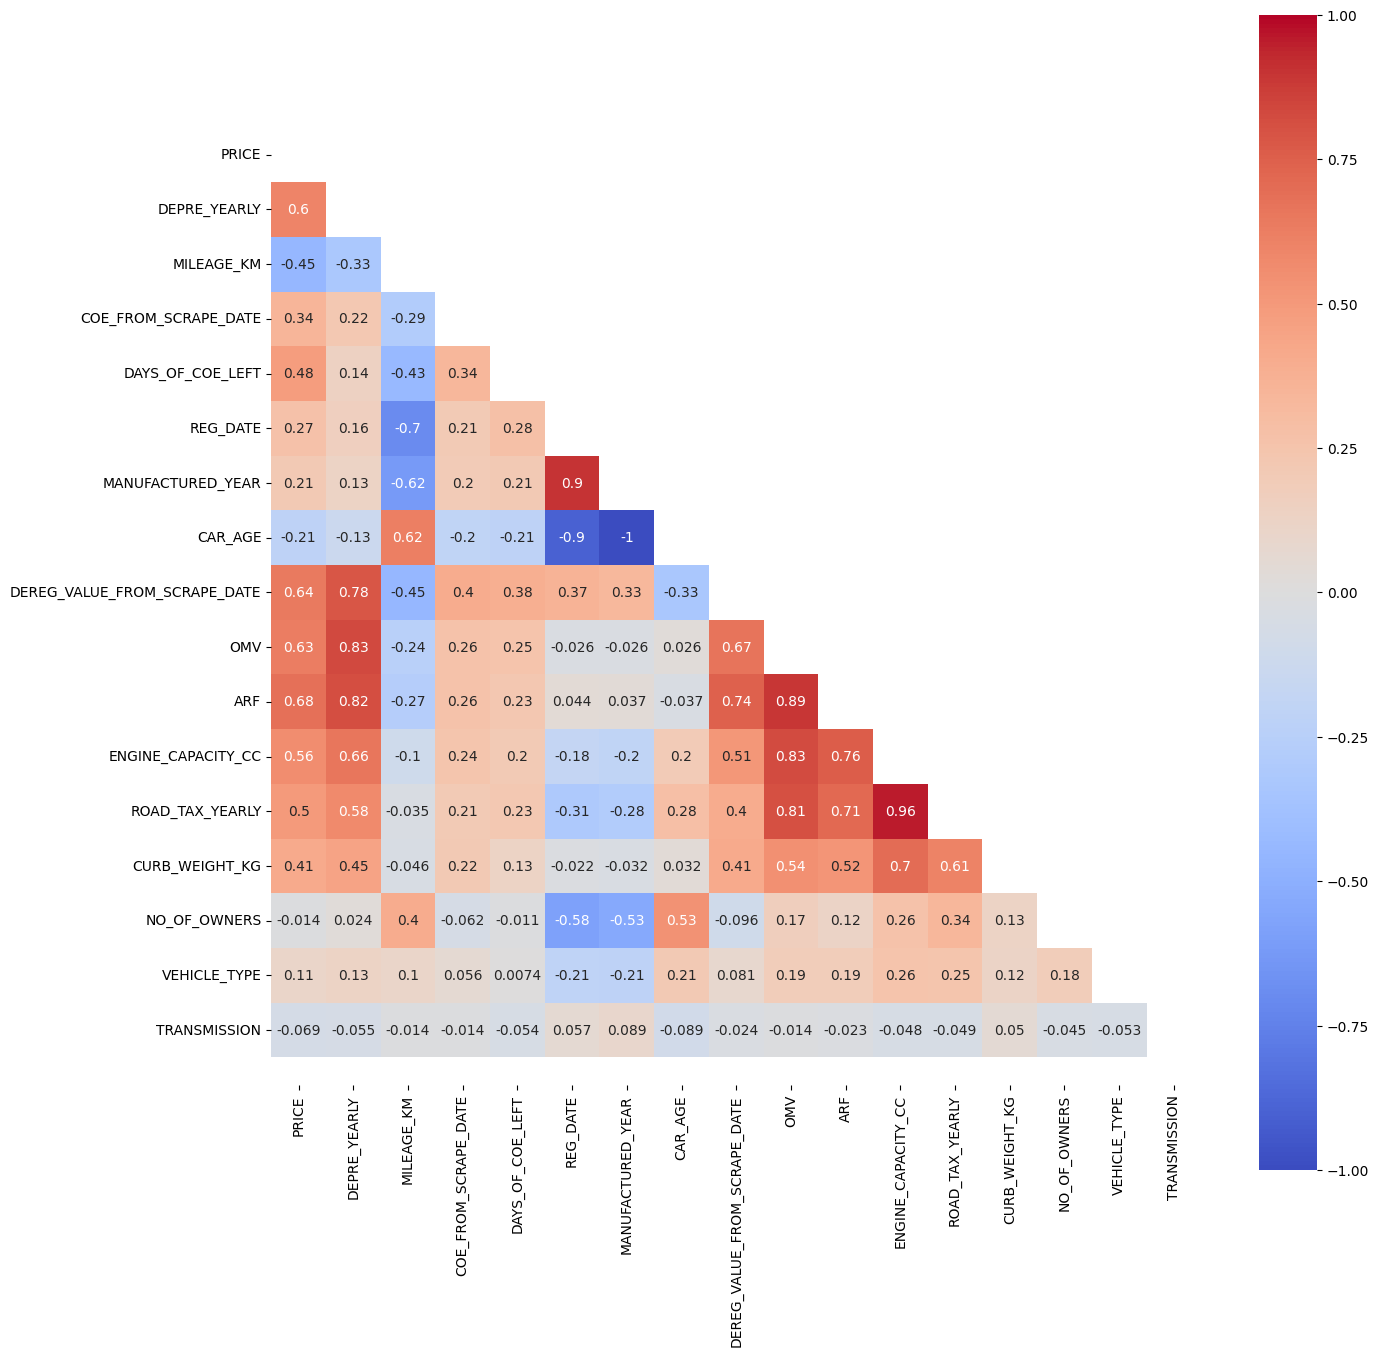

In [119]:
# Corr Matrix Heatmap Visualization

#sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_price_no_brands.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_price_no_brands.corr(), mask=mask, annot=True, 
            square=True, cmap="coolwarm" , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [120]:
df_price_no_brands2 = df_price_no_brands.copy()
df_price_no_brands2.drop(['DEPRE_YEARLY','REG_DATE','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE',
                         'ARF','ROAD_TAX_YEARLY','VEHICLE_TYPE'],axis=1,inplace=True)
df_price_no_brands2.columns

Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

(10.5, -0.5)

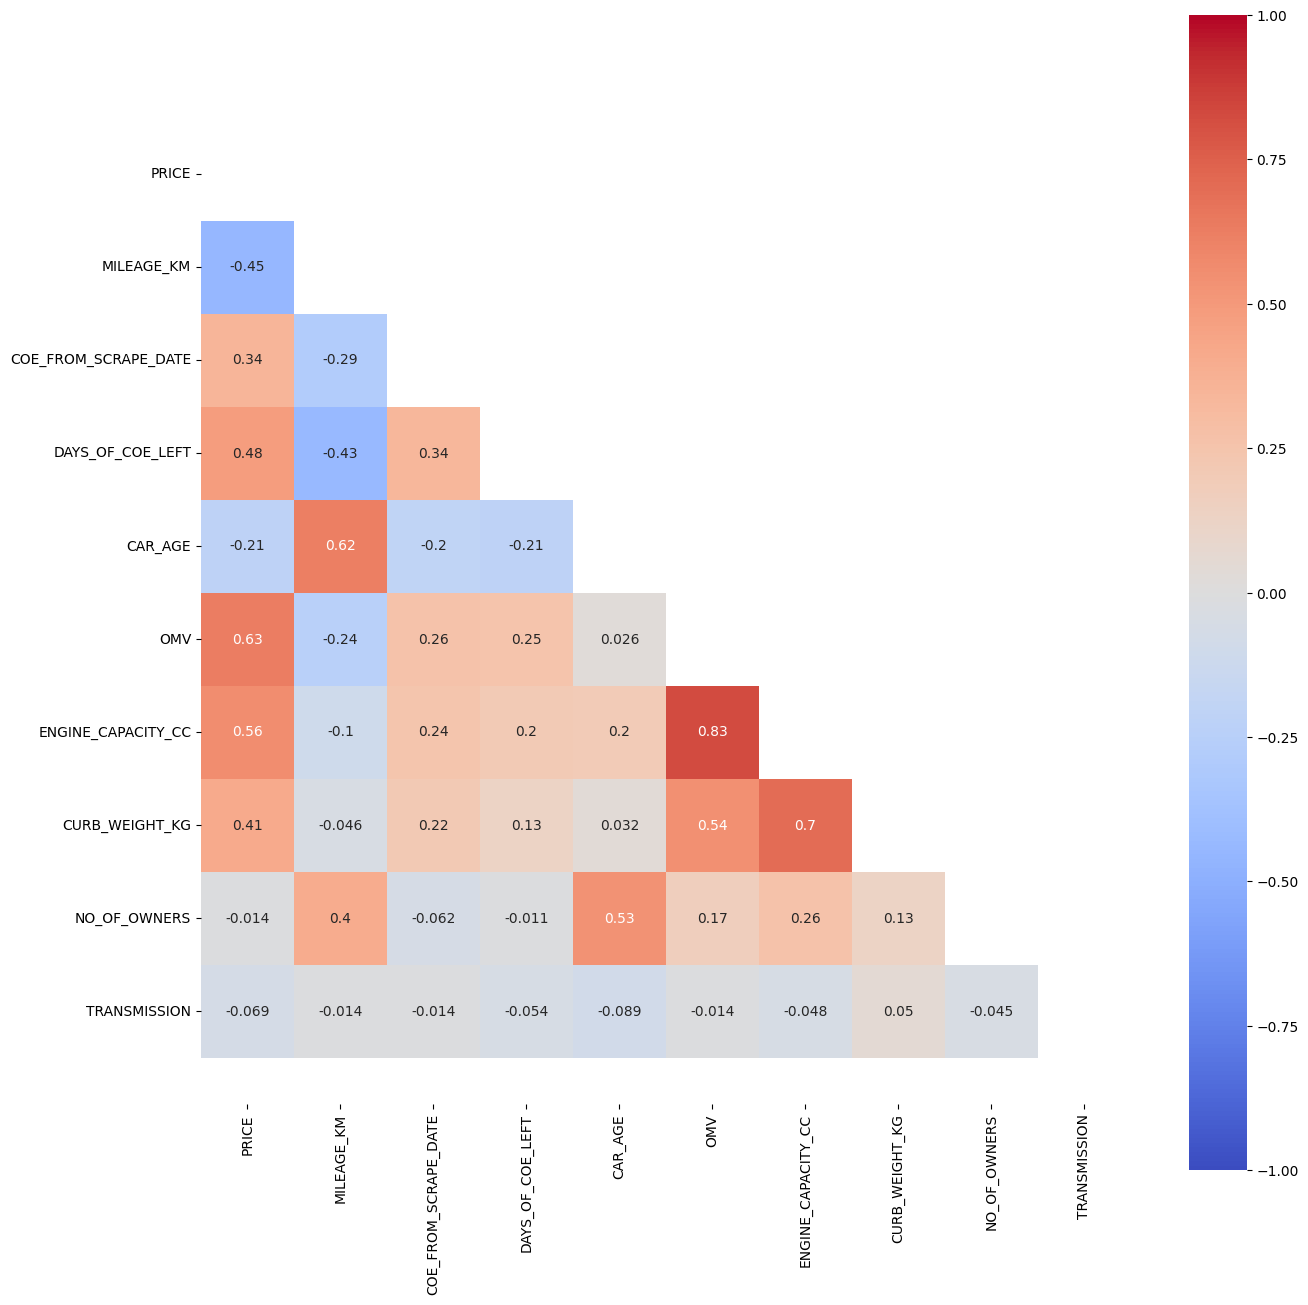

In [121]:
# Creating the data
data = df_price_no_brands2.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap="coolwarm" , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [122]:
df_price_no_brands.columns

Index(['PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'ENGINE_CAPACITY_CC',
       'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE',
       'TRANSMISSION'],
      dtype='object')

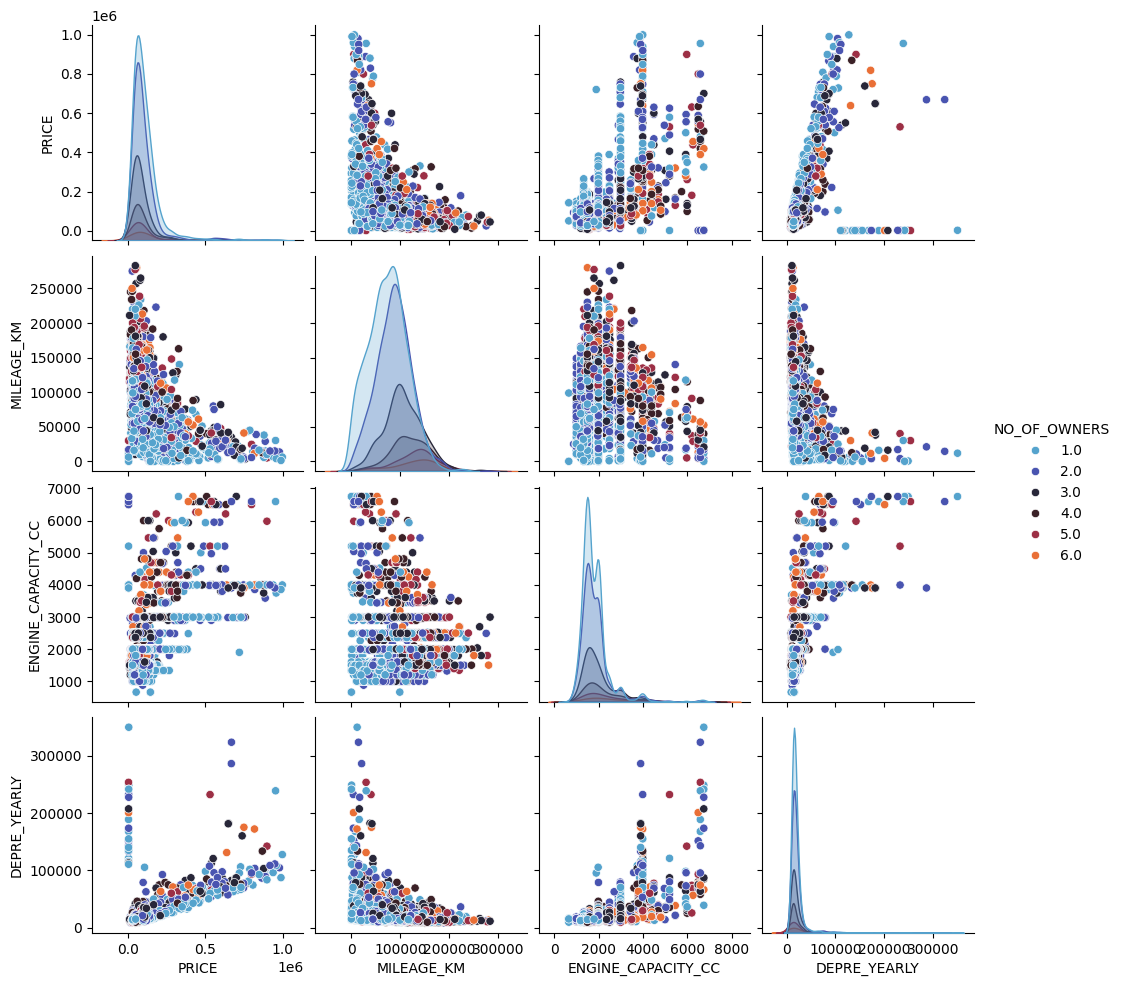

In [123]:
icefire_palette = sns.color_palette("icefire")  # Get a list of colors

sns.pairplot(df_price_no_brands[["PRICE", "MILEAGE_KM", "ENGINE_CAPACITY_CC", "DEPRE_YEARLY", "NO_OF_OWNERS"]], 
             hue="NO_OF_OWNERS",
             palette=icefire_palette)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [127]:
import sklearn
print(sklearn.__version__)

1.5.1


In [131]:
# Feature engineering
df_price_no_brands.loc[:, "CAR_AGE"] = 2024 - pd.to_datetime(df_price_no_brands["REG_DATE"]).dt.year
df_price_no_brands.loc[:, "REG_MONTH"] = pd.to_datetime(df_price_no_brands["REG_DATE"]).dt.month

# Split data
target = df_price_no_brands["PRICE"]
features = df_price_no_brands.drop(["REG_DATE", "PRICE"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming "REG_DATE" is not already encoded
df_encoded = pd.get_dummies(df_price_no_brands, columns=["REG_DATE", "VEHICLE_TYPE"])
df_encoded = df_encoded.reset_index(drop=True)

# Ensure indices are consistent
X_train_indices = X_train.index
X_test_indices = X_test.index

# Split data using encoded features
X_train_encoded = df_encoded.loc[X_train_indices]
X_test_encoded = df_encoded.loc[X_test_indices]

# OneHotEncoder for categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_encoded)
#X_train_encoded = encoder.fit_transform(X_train)  # Encode only training data
X_test_encoded = encoder.transform(X_test)

# StandardScaler for numerical features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_encoded)
#X_test_scaled = scaler.transform(X_test_encoded)

# Hyperparameter tuning with Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, Y_train)
best_rf = grid_search.best_estimator_

# Evaluate model performance
rf_confidence = best_rf.score(X_test_scaled, Y_test)
print("Random Forest Regression confidence:", rf_confidence)


KeyError: '[4698, 5917, 5522, 5113, 4570, 5070, 4790, 6521, 4976, 5023, 4533, 4748, 5166, 6446, 5628, 5783, 5327, 6639, 5057, 4862, 5408, 5216, 5908, 5731, 6429, 5486, 5602, 6549, 4341, 5739, 5082, 4663, 4868, 5356, 5778, 4942, 6354, 6185, 5147, 6023, 5742, 4669, 4734, 5095, 5861, 5473, 6242, 4926, 6417, 6159, 5958, 5024, 5204, 4579, 5829, 5302, 5050, 5709, 4715, 6402, 5313, 5641, 6477, 5458, 4673, 6331, 6192, 5800, 4338, 6278, 4934, 5836, 6458, 4842, 6360, 4347, 6382, 6328, 6317, 5884, 5451, 4631, 6545, 4893, 4818, 6413, 5532, 4912, 5330, 5235, 4980, 6661, 6630, 6655, 4327, 6150, 6564, 6489, 4740, 4761, 6060, 4932, 6666, 5765, 4852, 5707, 5730, 5608, 4873, 4466, 4719, 5986, 4507, 5768, 4945, 5871, 5365, 5880, 6543, 6600, 5600, 5472, 6268, 4323, 5754, 5466, 5890, 6671, 5598, 6672, 6472, 6669, 5528, 6301, 6636, 5208, 5167, 5025, 6222, 4653, 5886, 4917, 4972, 5407, 4821, 4590, 5485, 5520, 5594, 6108, 6476, 4962, 6492, 6506, 6130, 6306, 5758, 6359, 5141, 4502, 6358, 5542, 4861, 4677, 6539, 4391, 6311, 4908, 6674, 4371, 5555, 6481, 5201, 5902, 6179, 4869, 6026, 6436, 5212, 5823, 5717, 6665, 5010, 4610, 5367, 5189, 5146, 5564, 5517, 5959, 6462, 5669, 5239, 6602, 6227, 5454, 4722, 5038, 5531, 6249, 6540, 6625, 4674, 5074, 4875, 5482, 5863, 6235, 6468, 5354, 6195, 5187, 5640, 5213, 5855, 5431, 5581, 5209, 5005, 5474, 6523, 4351, 4990, 6712, 6404, 5967, 5271, 5508, 5342, 5042, 4516, 6009, 4866, 6601, 5957, 4977, 5619, 5733, 5006, 4723, 5362, 4829, 6310, 5423, 5978, 6077, 5256, 5515, 5579, 6237, 5617, 6104, 5571, 4911, 4491, 5947, 4430, 5436, 5261, 4957, 6342, 4703, 5409, 6126, 6247, 4530, 6075, 4843, 6283, 5933, 6635, 4450, 4644, 5722, 5904, 6038, 5952, 6098, 6599, 5858, 5349, 6209, 5144, 6640, 5099, 4902, 5244, 6433, 6702, 5901, 6113, 4562, 5145, 4999, 6682, 5664, 6380, 4469, 4461, 6204, 4400, 5021, 4884, 6332, 6368, 5897, 5695, 6466, 5501, 6567, 6449, 4577, 5296, 5499, 5759, 4381, 5307, 5183, 6357, 4527, 5932, 4914, 5353, 4470, 5712, 5799, 4783, 6557, 4368, 4729, 5914, 6030, 5939, 4779, 4487, 5206, 5767, 4542, 6142, 4838, 4648, 4964, 4566, 6052, 5072, 5699, 5509, 5383, 5566, 6716, 4699, 4896, 6519, 4551, 6161, 5796, 5899, 4377, 6386, 5214, 6371, 4998, 4397, 5197, 4471, 6155, 4589, 6590, 5247, 5397, 4943, 5192, 4484, 4879, 4453, 4439, 4454, 5543, 6044, 5944, 6175, 6643, 6691, 5560, 5112, 5416, 5741, 4620, 5657, 5284, 6033, 5133, 4380, 4681, 4595, 6423, 6452, 4974, 6256, 6321, 6369, 6470, 6309, 6577, 6659, 4785, 5572, 6263, 4591, 6305, 5597, 5827, 4443, 5874, 6297, 5376, 6619, 6699, 4731, 4771, 6430, 4633, 5314, 4457, 6345, 5646, 5791, 5705, 4797, 6569, 6419, 6415, 4540, 5159, 5590, 5535, 4618, 4871, 6346, 5920, 5448, 6632, 6396, 6258, 5951, 5185, 4919, 4713, 4697, 6049, 6032, 5368, 4386, 5860, 6021, 5275, 6133, 5787, 6501, 5283, 5582, 4441, 5841, 5394, 5176, 5889, 5324, 4573, 6291, 4918, 6287, 4786, 5819, 4826, 6083, 4472, 5645, 6257, 6255, 5697, 5344, 5844, 4724, 4716, 4936, 5433, 6375, 4636, 4658, 4978, 4839, 5831, 6525, 5905, 5007, 4730, 4800, 6352, 5792, 4437, 6587, 5129, 4404, 5014, 6657, 6513, 6532, 4900, 4961, 5377, 5479, 6022, 4452, 6198, 5084, 6605, 6212, 5489, 6304, 5674, 5971, 6279, 4665, 4645, 6372, 5577, 4625, 6125, 6445, 6066, 4702, 4741, 6356, 5919, 5785, 4408, 4762, 5041, 4946, 6705, 5160, 4705, 5033, 4793, 4717, 5267, 5468, 6074, 4924, 6039, 5009, 5194, 5751, 5988, 5693, 4819, 4619, 5592, 4366, 6115, 6327, 4956, 4822, 4639, 6425, 5266, 4929, 5274, 6353, 4676, 5131, 5533, 5063, 4541, 5721, 5568, 5985, 4321, 6276, 6248, 4585, 5211, 6612, 5995, 5622, 6574, 5589, 5977, 5570, 6236, 5447, 4463, 4630, 6687, 5854, 6450, 5805, 4764, 5850, 5426, 5866, 6281, 6220, 5406, 6444, 5419, 4622, 6096, 5053, 5887, 5048, 6272, 6223, 5343, 4765, 5660, 5463, 5784, 5193, 5469, 5921, 5476, 6280, 6517, 6515, 4759, 6041, 6483, 6370, 5896, 6693, 5357, 5898, 5493, 4915, 6086, 4688, 4478, 4709, 5686, 4979, 4462, 4409, 5417, 6092, 4747, 6154, 4564, 4744, 6140, 6145, 6677, 6010, 5246, 5992, 4870, 6441, 5265, 5661, 6641, 4379, 4504, 5232, 6604, 5786, 5134, 5607, 5173, 6225, 4532, 6479, 5867, 5157, 5111, 5180, 5170, 6473, 6224, 6565, 4743, 5149, 6290, 6170, 4438, 5771, 6664, 5051, 4511, 5804, 5360, 5834, 4615, 6570, 5750, 5085, 5268, 5379, 6528, 4600, 5287, 6656, 5315, 5936, 5732, 4581, 5498, 4505, 5418, 5690, 4495, 6062, 5442, 5609, 4814, 4555, 4583, 5329, 5453, 5918, 5222, 4503, 6480, 5588, 5997, 5955, 6147, 4372, 5400, 5292, 5772, 5089, 4460, 5832, 5773, 5432, 6330, 4798, 5293, 6393, 5352, 5781, 6364, 5199, 5098, 4319, 6157, 6215, 4442, 4489, 5583, 4431, 4888, 5310, 4845, 4498, 6156, 6087, 4850, 5727, 5277, 5059, 5322, 5398, 4508, 5043, 6187, 6367, 4418, 5565, 4584, 4931, 5345, 4711, 4523, 4436, 4447, 4348, 4513, 5595, 5081, 4616, 5221, 4393, 6431, 4718, 6152, 5225, 4885, 5289, 6177, 6059, 5612, 6173, 5862, 4894, 4904, 5681, 4726, 4810, 4401, 6119, 5704, 5790, 6561, 5728, 4482, 5195, 6437, 5818, 4872, 5970, 4949, 6566, 6131, 5151, 5135, 6350, 4477, 4558, 5737, 4598, 4376, 6172, 5625, 4982, 4672, 4339, 5036, 5243, 5903, 5381, 4693, 4416, 4343, 4692, 6112, 5162, 5550, 5691, 6184, 5223, 5370, 5439, 6100, 6455, 6478, 5093, 4561, 6202, 5925, 5382, 5843, 6681, 4774, 6072, 6031, 5911, 5455, 4960, 5575, 4548, 5814, 6406, 5391, 5153, 4883, 5260, 5824, 6410, 5020, 4432, 4646, 5931, 5119, 5916, 4603, 4889, 4787, 6387, 6071, 5979, 4634, 4997, 5630, 5502, 4572, 4652, 4812, 6516, 6295, 4880, 5541, 5629, 5347, 4342, 6508, 6254, 4804, 6488, 5870, 6121, 5326, 6167, 5953, 6025, 5833, 4349, 4617, 5359, 4387, 4769, 6351, 5399, 5334, 4890, 5530, 5060, 4770, 4690, 6645, 4509, 6176, 5155, 5220, 6535, 5659, 6503, 6497, 5412, 6384, 5813, 6076, 5491, 4429, 4799, 4398, 5788, 4388, 5110, 5039, 6065, 6707, 6552, 5156, 4601, 6343, 4752, 4846, 6323, 5198, 6544, 5429, 4892, 4525, 4427, 5178, 5130, 5696, 5756, 4440, 5934, 6091, 6229, 4428, 6505, 5490, 6453, 5703, 6420, 6363, 6047, 4635, 4476, 4535, 5291, 6474, 5729, 4739, 4855, 4721, 4738, 5984, 5280, 5054, 5847, 5798, 4329, 5298, 5974, 6053, 4588, 6529, 4483, 4384, 6631, 4834, 5034, 6034, 5358, 6216, 4927, 5757, 4675, 4515, 6644, 5203, 5999, 6634, 5254, 5158, 6697, 4626, 6422, 5290, 6475, 6160, 6709, 5028, 5549, 4848, 5556, 6061, 4767, 4552, 5711, 5188, 5196, 5321, 4374, 5333, 6148, 6580, 6199, 6333, 5883, 5015, 4475, 5859, 4604, 4939, 6093, 6205, 4951, 4921, 6365, 4830, 5779, 5648, 6620, 5215, 6326, 6706, 4628, 4531, 4992, 4390, 5258, 5071, 5546, 4559, 5046, 5435, 4337, 5375, 6374, 6642, 4660, 5734, 5350, 5545, 5837, 5125, 6596, 5808, 5332, 5815, 6269, 5122, 6629, 6650, 5613, 4754, 4905, 5137, 5026, 6518, 4364, 5965, 4328, 5654, 4825, 4817, 5511, 6037, 6208, 5895, 5177, 5968, 5355, 4775, 6132, 4898, 6239, 4407, 4501, 6045, 5503, 4965, 4670, 4519, 6411, 5241, 4543, 4922, 5331, 4807, 5852] not in index'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
X_train["REG_DATE"] = pd.to_datetime(X_train["REG_DATE"]).dt.year
X_test["REG_DATE"] = pd.to_datetime(X_test["REG_DATE"]).dt.year

#X_train.drop("REG_DATE", axis=1, inplace=True)
#X_test["REG_YEAR"] = pd.to_datetime(X_test["REG_DATE"]).dt.]ear
#X_test.drop("REG_DATE", axis=1, inplace=True)
print(f"X_train dtype: \n{X_train.dtypes}")
print(f"\nX_test dtype: \n{X_test.dtypes}")
print(f"Y_train dtype: {Y_train.dtype}")
print(f"Y_test dtype: {Y_test.dtype}")

X_train dtype: 
DEPRE_YEARLY                    float64
MILEAGE_KM                      float64
COE_FROM_SCRAPE_DATE            float64
DAYS_OF_COE_LEFT                float64
REG_DATE                          int32
MANUFACTURED_YEAR                 int32
CAR_AGE                         float64
DEREG_VALUE_FROM_SCRAPE_DATE    float64
OMV                             float64
ARF                             float64
ENGINE_CAPACITY_CC              float64
ROAD_TAX_YEARLY                 float64
CURB_WEIGHT_KG                  float64
NO_OF_OWNERS                    float64
VEHICLE_TYPE                     object
TRANSMISSION                      int64
dtype: object

X_test dtype: 
DEPRE_YEARLY                    float64
MILEAGE_KM                      float64
COE_FROM_SCRAPE_DATE            float64
DAYS_OF_COE_LEFT                float64
REG_DATE                          int32
MANUFACTURED_YEAR                 int32
CAR_AGE                         float64
DEREG_VALUE_FROM_SCRAPE_DATE    fl

In [ ]:
df_encode = pd.get_dummies(df_price_no_brands)
df_encode.head()

,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,...,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,VEHICLE_TYPE_1.0,VEHICLE_TYPE_2.0,VEHICLE_TYPE_3.0,VEHICLE_TYPE_4.0,VEHICLE_TYPE_5.0,VEHICLE_TYPE_6.0,VEHICLE_TYPE_7.0
1,78800.0,14790.0,94000.0,25501.0,1647.0,2019-03-21,2019,5.0,27800.0,22254.0,...,1200.0,1.0,1,True,False,False,False,False,False,False
3,53800.0,18370.0,88453.0,56500.0,820.0,2017-01-03,2016,8.0,26349.0,24971.0,...,1395.0,1.0,1,False,True,False,False,False,False,False
4,157800.0,22740.0,65000.0,41510.0,2199.0,2020-09-23,2019,5.0,55345.0,34487.0,...,1775.0,1.0,1,False,False,False,False,False,True,False
5,45800.0,13700.0,106000.0,53001.0,1003.0,2017-06-27,2017,7.0,23659.0,14601.0,...,1591.0,2.0,1,True,False,False,False,False,False,False
6,17300.0,17440.0,160000.0,16457.0,38.0,2010-09-30,2010,14.0,3264.0,36125.0,...,1450.0,2.0,1,False,False,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train_encoded = pd.get_dummies(X_train, columns=["REG_DATE"])

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3)
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:

rf_confidence = rf.score(X_test, Y_test)
print("Random Forest Regression confidence:", rf_confidence)

Random Forest Regression confidence: 0.654967002817963
